In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [2]:
def metropolis_hastings_1(P, n):
    sample = [np.random.uniform()]
    for i in range(n):
        present = sample[i]
        prop = Q(present)
        alpha = P(pesent) * 

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [3]:
# Your code here

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [4]:
# Your code here

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [4]:
from scipy.fft import fft, fftshift, fftfreq

In [3]:
n = 1000
ti = 0    #s
tf = 20   #s
t = np.linspace(ti, tf, n)
x = 2 * np.sin(t) + np.sin(10 * t)

<IPython.core.display.Javascript object>


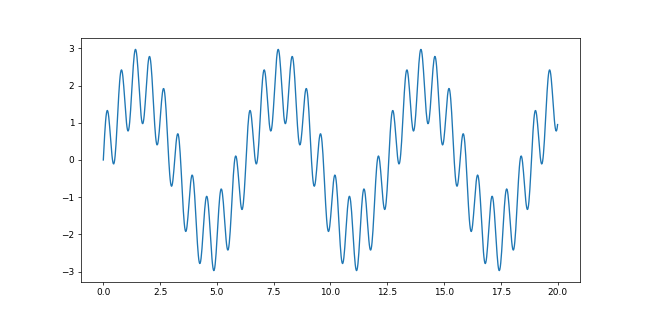

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

In [5]:
T = (tf - ti) / n
A = np.abs(fft(x))[:n // 2]
F = fftfreq(n, T)[:n // 2]

<IPython.core.display.Javascript object>


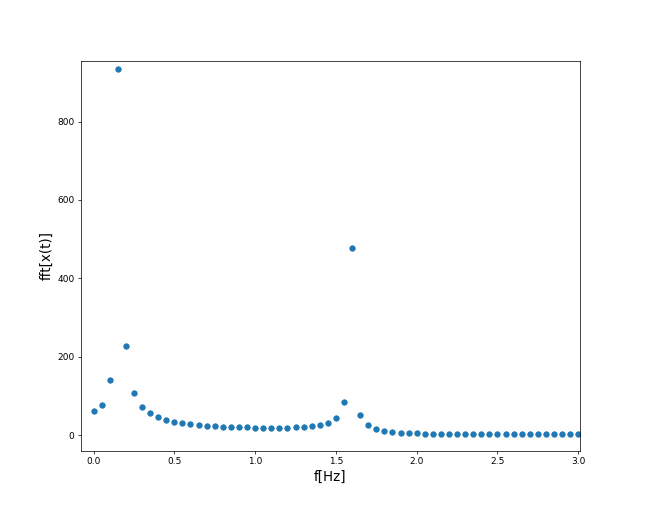

Text(0, 0.5, 'fft[x(t)]')

In [47]:
%matplotlib notebook
plt.figure(figsize = (10, 8))
plt.plot(F, A, 'o')
plt.xlabel('f[Hz]', fontsize = 15)
plt.ylabel('fft[x(t)]', fontsize = 15)

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [25]:
f_1 = np.argmax(A)
print('the most prominent frequency is: ', F[f_1])
f_2 = np.argmax(A[f_1 + 1:])
print('the second most prominent frequency is: ', F[f_2])

the most prominent frequency is:  0.15000000000000002
the second most prominent frequency is:  1.4000000000000001


but according to the formula for x, the first and second most prominent frequencies must be respectively $\frac{1}{2\pi}(\approx0.159)$ and $\frac{10}{2\pi}(\approx1.59)$.

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [3]:
from scipy.signal import sawtooth

In [35]:
n = 1000
t = np.linspace(0, 20, n)
s = sawtooth(t)

<IPython.core.display.Javascript object>


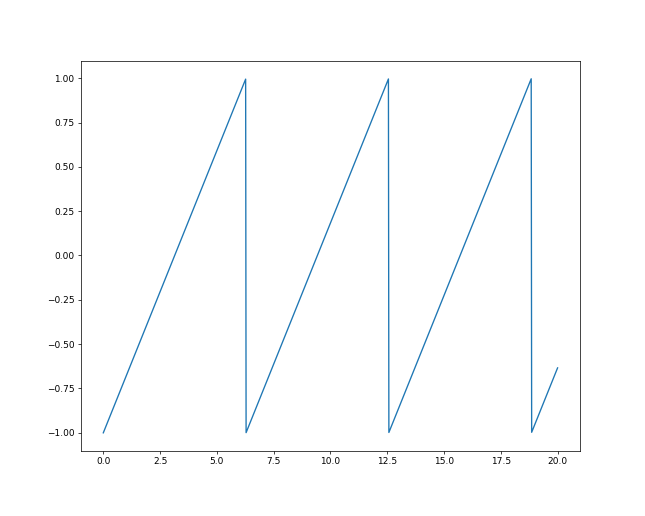

In [36]:
plt.figure(figsize = (10, 8))
plt.plot(t, s)

In [39]:
T = (20 - 0) / n
amps = (fft(s))[:n // 2]
freq = fftfreq(n, T)[:n // 2]

<IPython.core.display.Javascript object>


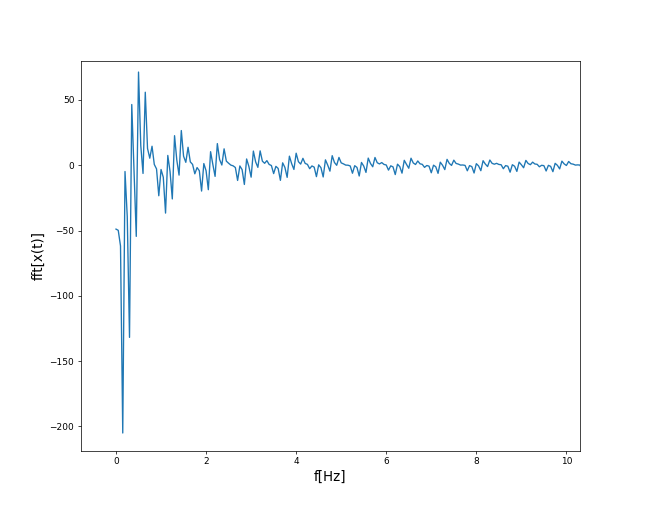

/home/alireza/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'fft[x(t)]')

In [46]:
plt.figure(figsize = (10, 8))
plt.plot(freq, amps)
plt.xlabel('f[Hz]', fontsize = 15)
plt.ylabel('fft[x(t)]', fontsize = 15)

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('Sunspots.csv', index_col = 0)

In [7]:
data

,Date,Monthly
Num,,
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0


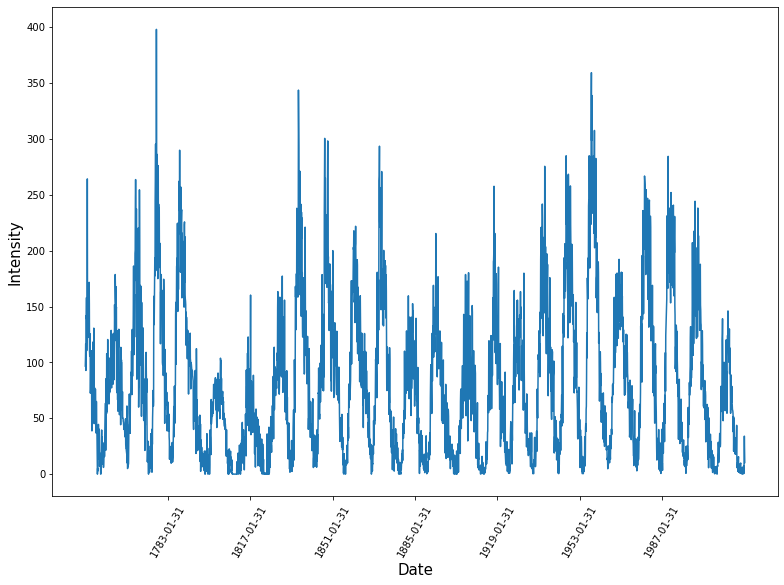

In [8]:
plt.figure(figsize = (13, 9))
l = data.shape[0]
plt.plot(data['Date'], data['Monthly'])
plt.xticks(np.arange(0, l, l // 8)[1:-1], rotation = 60)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [136]:
def date_parser(s):
    result = []
    i = 0
    n = len(s)
    for j in range(n + 1):
        if j == n or s[j] == '-':
            result.append(int(s[i : j]))
            i = j + 1
    return result

In [139]:
dates = np.array([date_parser(s) for s in np.array(data['Date'])])

<IPython.core.display.Javascript object>


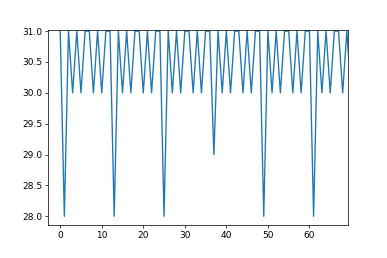

In [144]:
plt.plot(dates[:, 2])

In [57]:
T = 30
amps = (np.abs(fft(np.array(data['Monthly']))))[:l // 2]
freq = fftfreq(l, T)[:l // 2]

<IPython.core.display.Javascript object>


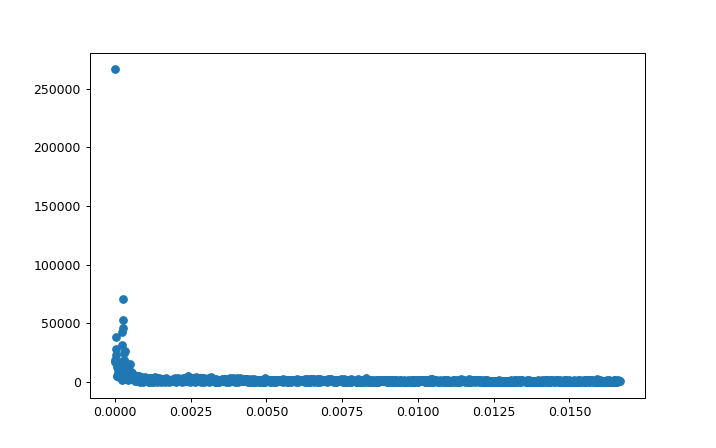

In [58]:
%matplotlib notebook
plt.figure(figsize = (8, 5))
plt.plot(freq, amps, 'o')

In [18]:
f_m = freq[amps[amps.argmax() + 1:].argmax()]

In [19]:
T_m = 1 / f_m

In [29]:
print('the main period is: %f (days)' % T_m)

the main period is: 4081.250000 (days)


## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [30]:
from scipy.fft import ifft

In [50]:
intensity_reconstructed = ifft(fft(np.array(data['Monthly'])))

<IPython.core.display.Javascript object>


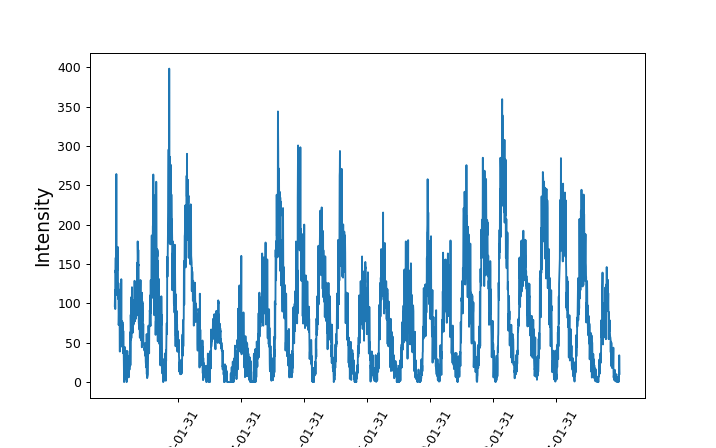

/home/alireza/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [39]:
plt.figure(figsize = (8, 5))
l = data.shape[0]
plt.plot(data['Date'], intensity_reconstructed)
plt.xticks(np.arange(0, l, l // 8)[1:-1], rotation = 60)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.show()

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [74]:
new_amps = fft(np.array(data['Monthly']))
abs_amps = np.abs(new_amps[:l // 2 + 1])

In [75]:
count = 0
while count < 10:
    position = abs_amps.argmax()
    abs_amps[position], new_amps[position], new_amps[-position],  = 0, 0, 0
    print(freq[position])
    count += 1

0.0
0.00025523226135783564
0.0002756508422664625
0.0002654415518121491
0.0002348136804492088
3.0627871362940275e-05
0.0002450229709035222
4.0837161817253704e-05
0.00032669729453802963
0.00029606942317508936


<IPython.core.display.Javascript object>


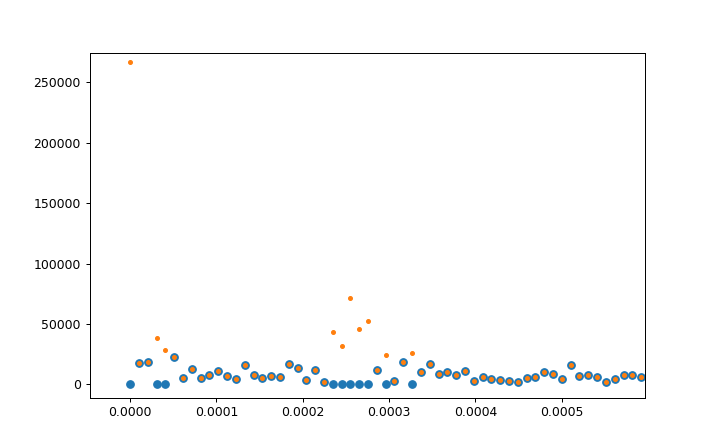

In [81]:
plt.figure(figsize = (8, 5))
plt.plot(freq, np.abs(new_amps[:l // 2]), 'o')
plt.plot(freq, np.abs(amps[:l // 2]), '.')


In [77]:
intensity_reconstructed2 = ifft(new_amps)

<IPython.core.display.Javascript object>


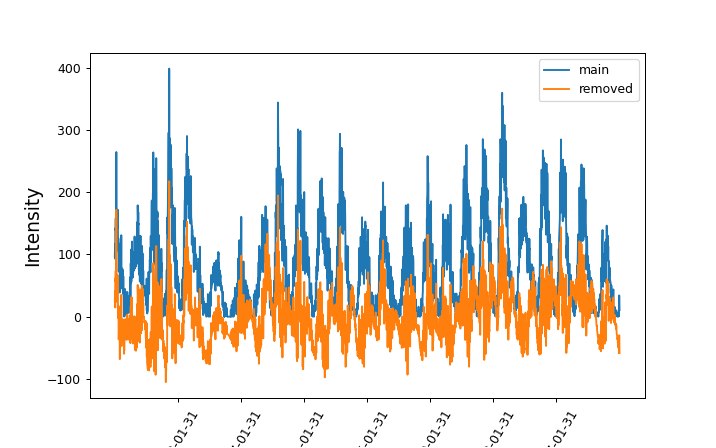

/home/alireza/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/alireza/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [82]:
plt.figure(figsize = (8, 5))
plt.plot(data['Date'], intensity_reconstructed, label = 'main')
plt.plot(data['Date'], intensity_reconstructed2, label = 'removed')
plt.xticks(np.arange(0, l, l // 8)[1:-1], rotation = 60)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.legend()
plt.show()

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [2]:
data = np.loadtxt('2pcf.txt')

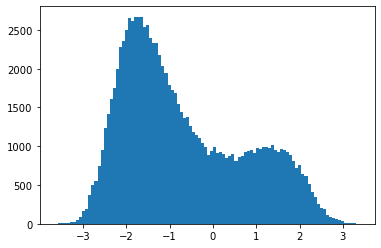

In [7]:
plt.hist(data, bins = 100)
plt.show()

In [18]:
def autocorrelate(data, tau):
    return np.mean(data[tau:] * data[:-tau])

In [28]:
acf = [autocorrelate(data, tau) for tau in range(1, len(data))]

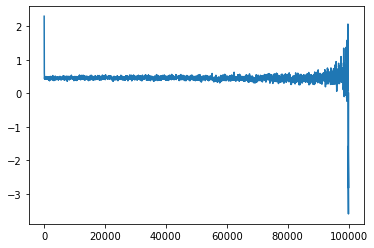

In [29]:
plt.plot(acf)

In [26]:
# Your answers here

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

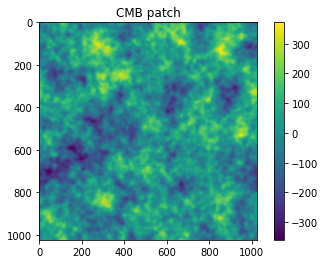

In [4]:
...

In [ ]:
# Your answers here